In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
import pickle

import readdy_learn.example.predator_prey as pp

In [2]:
TARGET_TIME = .0001

In [3]:
time, count, dcount_dt = pp.generate_lma(0, TARGET_TIME)

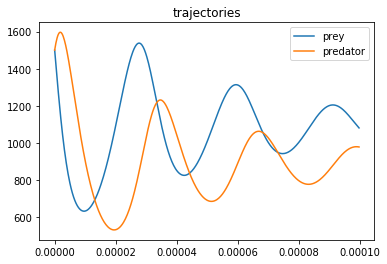

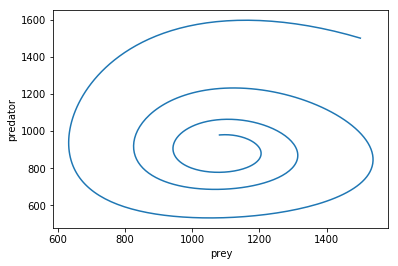

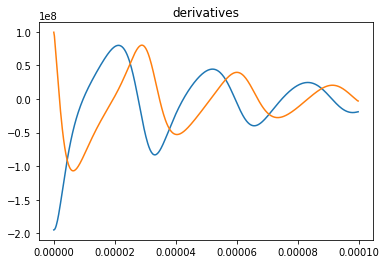

In [4]:
plt.plot(time, count[:, 0], label='prey')
plt.plot(time, count[:, 1], label='predator')
plt.title('trajectories')
plt.legend()
plt.show()

plt.plot(count[:, 0], count[:, 1])
plt.xlabel('prey')
plt.ylabel('predator')
plt.show()

plt.plot(time,  dcount_dt)
plt.title('derivatives')
plt.show()

In [5]:
X = pp.solve(count, dcount_dt, 0., 1.)
print("Absolute error:", X-pp.RATES)
print("Relative error:", (X - pp.RATES) / pp.RATES)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
16 / 30000 iterations
Absolute error: [-6.85154206e-01 -2.03587532e+00 -1.19929934e+05 -1.20121274e+02
 -9.99575678e+04 -7.94188273e+01 -8.00700654e+04  3.90886968e+00
 -1.00042432e+05  1.45972005e+00 -4.02277735e+01  4.05159834e+01
  4.00749609e+04 -3.99951193e+04 -1.47630586e+02  7.98604059e+01]
Relative error: [-0.06851542 -0.20358753 -0.59964967 -0.60060637 -0.49978784        -inf
        -inf         inf        -inf         inf        -inf         inf
         inf        -inf        -inf         inf]


/home/mho/miniconda3/envs/readdy_learn/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cv = pp.cv(count, dcount_dt, alphas=np.logspace(-5, -2, num=20), n_splits=15, njobs=5)

validating across grid with 20 alphas, 1 lambdas, 1 cutoffs with 1 realizations


Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-15
Solving for tolerance 1e-14


In [14]:
time, count, dcount_dt = pp.generate_kmc(0, TARGET_TIME, n_realizations=3, njobs=6)

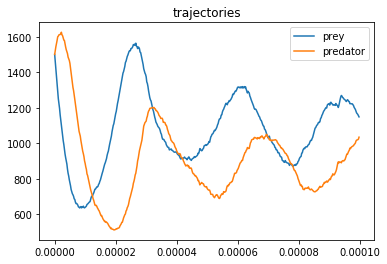

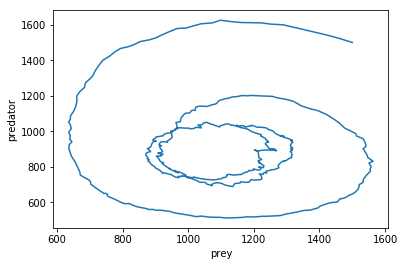

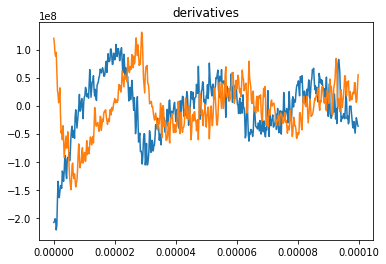

In [15]:
plt.plot(time, count[:, 0], label='prey')
plt.plot(time, count[:, 1], label='predator')
plt.title('trajectories')
plt.legend()
plt.show()

plt.plot(count[:, 0], count[:, 1])
plt.xlabel('prey')
plt.ylabel('predator')
plt.show()

plt.plot(time,  dcount_dt)
plt.title('derivatives')
plt.show()

In [16]:
X = pp.solve(count, dcount_dt, 0., 1.)
print("Relative error:", (X - pp.RATES) / pp.RATES)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
9 / 30000 iterations
Relative error: [ 0.26977588 -0.14615862  0.03913712  0.01234644  0.02986762]
